# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [2]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

# Part 1 (100 points total)

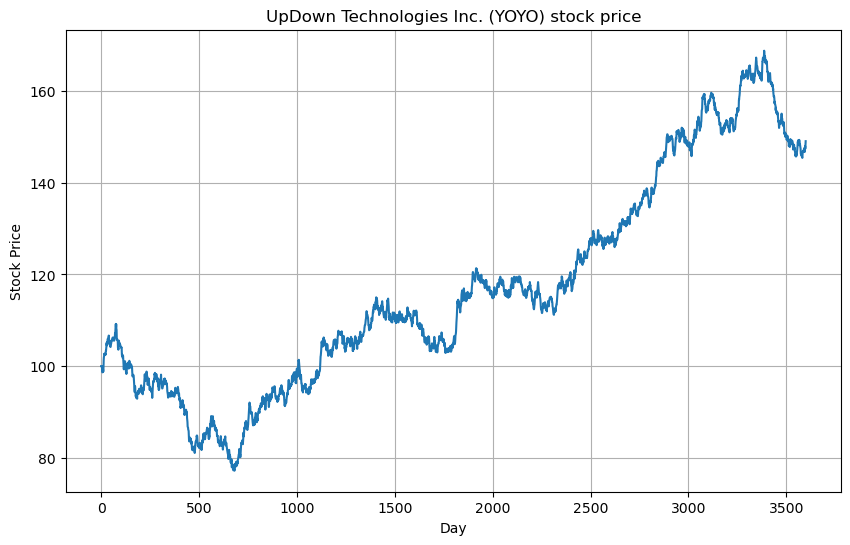

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def generate_synthetic_stock_data(n_days: int, initial_price: float, order: int, noise_std: float, seed: int) -> np.array:
    # Seed for reproducibility
    np.random.seed(seed)
    
    # Initialize stock prices
    stock_prices = np.zeros(n_days)
    stock_prices[:order] = initial_price
    
    # Autoregressive coefficients for linear and quadratic terms - choosing smaller values
    linear_coefficients = np.random.uniform(-0.05, 0.05, order)
    quadratic_coefficients = np.random.uniform(-0.005, 0.005, order)
    
    # Generate stock prices with P_t-1 as the intercept
    for t in range(order, n_days):
        intercept = stock_prices[t-1]
        linear_term = np.sum(linear_coefficients * (stock_prices[t-order:t] - intercept))
        quadratic_term = np.sum(quadratic_coefficients * (stock_prices[t-order:t] - intercept)**2)
        
        # Adding a noise term with specified standard deviation
        noise = np.random.normal(0, noise_std)
        
        # Calculate stock price with clipping
        stock_prices[t] = np.clip(intercept + linear_term + quadratic_term + noise, 1, None)
    
    return stock_prices

# Test the function with a specific seed
test_stock_data = generate_synthetic_stock_data(3600, 100, 5, 0.5, 50)

# Plotting the generated stock prices with a specific seed
plt.figure(figsize=(10,6))
plt.plot(test_stock_data)
plt.title('UpDown Technologies Inc. (YOYO) stock price')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

### Question 1 (10 points)

Given a time series of stock prices $S = [s_1, s_2, ..., s_n]$, where $s_i$ is the stock price at time $i$, your task is to create a feature matrix $X$ and target vector $y$ for training a regression model. The feature matrix $X$ should be constructed such that each row corresponds to a window of $k$ consecutive stock prices, and the target vector $y$ should correspond to the stock price immediately following each window. Mathematically, the $i$-th row in $X$ and $y$ should be

$$
X_i = [s_i, s_{i+1}, ..., s_{i+k-1}] \quad \text{and} \quad y_i = s_{i+k}
$$

for $i = 1$ to $n-k$, where $n$ is the total number of observations in the time series, and $k$ is the window size. Implement a function `create_features` that takes a numpy array of stock prices and an integer $k$ as input and returns the feature matrix $X$ and target vector $y$. You should use the `numpy.lib.stride_tricks.sliding_window_view` function to create the feature matrix.

Function signature: **`def create_features(time_series: np.array, k: int) -> (np.array, np.array):`**

### Constraints:

- The `time_series` numpy array will have at least $k+1$ elements.
- $k$ is a positive integer less than the length of the `time_series`.

In [4]:
import numpy as np

def create_features(time_series: np.array, k: int) -> (np.array, np.array):
    # Create a sliding window view of the time series with window size k
    # YOUR CODE HERE
    y = [] #Create a list for the y vector
    X = [] #Create a list for the X matrix
    
    #For each value k to the end, slide the window and take the values
    for i in range(k, len(time_series)):
        y.append(time_series[i]) #Get the current k value for the y vector
        X.append(list(time_series[i-k:i])) #Get the window size k between current spot i and current spot i minus window size k
        
    return np.array(X), np.array(y) #Return the X and y as numpy arrays as requested

In [5]:
# Test the solution with a sample time series and window size
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = 3
X, y = create_features(time_series, k)
X, y  # Display the result to check if the function is working as expected

(array([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5],
        [4, 5, 6],
        [5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]]),
 array([ 4,  5,  6,  7,  8,  9, 10]))

In [6]:
# 10 points
def test_create_features():
    # Test 1
    time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    k = 3
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8], [7, 8, 9]])), f'Error: {X}'
    assert np.array_equal(y, np.array([4, 5, 6, 7, 8, 9, 10])), f'Error: {y}'
    
    # Test 2
    time_series = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
    k = 4
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[ 2,  4,  6,  8], [ 4,  6,  8, 10], [ 6,  8, 10, 12], [ 8, 10, 12, 14], [10, 12, 14, 16], [12, 14, 16, 18]])), f'Error: {X}'
    assert np.array_equal(y, np.array([10, 12, 14, 16, 18, 20])), f'Error: {y}'
    
    # Test 3
    time_series = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
    k = 2
    X, y = create_features(time_series, k)
    assert np.array_equal(X, np.array([[ 3,  6], [ 6,  9], [ 9, 12], [12, 15], [15, 18], [18, 21], [21, 24], [24, 27]])), f'Error: {X}'
    assert np.array_equal(y, np.array([ 9, 12, 15, 18, 21, 24, 27, 30])), f'Error: {y}'
    
test_create_features()  # If this raises no errors, the tests passed


### Question 2 (10 points)

In this part of the exercise, you are tasked with implementing a polynomial expansion of the feature matrix $X$. The expanded feature matrix $X_{\text{poly}}$ should have each feature in $X$ raised to the powers from 1 to $m$, where $m$ is the specified degree of the polynomial. Each feature should be transformed independently, meaning there should be no interaction terms between different features. 

For instance, if $X$ is a feature matrix:

$$
X = 
\begin{bmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
x_{31} & x_{32} 
\end{bmatrix}
$$

and $m=3$, the expanded feature matrix $X_{\text{poly}}$ would be:

$$
X_{\text{poly}} = 
\begin{bmatrix}
x_{11} & x_{11}^2 & x_{11}^3 & x_{12} & x_{12}^2 & x_{12}^3 \\
x_{21} & x_{21}^2 & x_{21}^3 & x_{22} & x_{22}^2 & x_{22}^3 \\
x_{31} & x_{31}^2 & x_{31}^3 & x_{32} & x_{32}^2 & x_{32}^3 
\end{bmatrix}
$$

Implement a function named `polynomial_expansion` with the following signature:

```python
def polynomial_expansion(X: np.array, degree: int) -> np.array:
    pass
```
### Note
Ensure that the function is efficient and avoids using loops if possible. Utilize Numpy's broadcasting and vectorization features to handle the operations on the matrix efficiently.

This one was interesting to do without loops. I decided on this implementation after looking at the functional programming on the sidebar from vectorization https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html . 

In [7]:
import numpy as np

def polynomial_expansion(X: np.array, degree: int) -> np.array:
    # YOUR CODE HERE
    degs = range(1, degree + 1) #Get the degree ranges, removing a for loop
    lambda_array = lambda x:  np.append([], np.power(x[:, np.newaxis], degs)) #Create a lambda function to extend the arrays and apply the power function
    #Numpy append makes it into one array rather than list append functionality. np.power was making two and without the extra list just made it mad.
    #array[:,np.newaxis] extends the array to go with the degrees, as shown in the broadcasting page
    
    X_poly = np.apply_along_axis(lambda_array, -1, X) #Apply the lambda function to the X array
        
    return X_poly.astype(np.int64) #Return the array, making it ints because it became floats for some reason

In [8]:
# Test the solution with a sample feature matrix and degree
X = np.array([[1, 2], [3, 4], [5, 6]])
degree = 3
X_poly = polynomial_expansion(X, degree)
X_poly  # Display the result to check if the function is working as expected

array([[  1,   1,   1,   2,   4,   8],
       [  3,   9,  27,   4,  16,  64],
       [  5,  25, 125,   6,  36, 216]], dtype=int64)

In [9]:
# 10 pts
def test_polynomial_expansion():
    # Test 1
    X = np.array([[1, 2], [3, 4], [5, 6]])
    degree = 3
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[  1,   1,   1,   2,   4,   8],
                         [  3,   9,  27,   4,  16,  64],
                         [  5,  25, 125,   6,  36, 216]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'
    
    # Test 2
    X = np.array([[2, 3], [4, 5]])
    degree = 2
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[ 2,  4,  3,  9],
                         [ 4, 16,  5, 25]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'
    
    # Test 3
    X = np.array([[1, 2, 3], [4, 5, 6]])
    degree = 4
    X_poly = polynomial_expansion(X, degree)
    expected = np.array([[  1,   1,   1,   1,   2,   4,   8,  16,   3,   9,  27,  81],
                         [  4,  16,  64, 256,   5,  25, 125, 625,   6,  36, 216, 1296]])
    assert np.array_equal(X_poly, expected), f'Error: {X_poly}'

test_polynomial_expansion()  # If this raises no errors, the tests passed

### Question 3 (20 points)

Goldman Sucks, a fictitious financial company, is utilizing a unique loss function for training their regression models. This loss function combines the Mean Squared Error (MSE) and a penalization component tailored for time series data where features are derived from a lag matrix with a polynomial expansion.

The total loss $L$ is calculated as follows:

$$
L(w, X, y) = \text{MSE}(w, X, y) + P(w, k, m, \lambda, \beta)
$$

where:
- $w$ is the vector of model weights, where the dimensions 0 is the intercept.
- $X$ is the feature matrix.
- $y$ is the target vector.
- $k$ is the window size of the lag matrix.
- $m$ is the degree of polynomial expansion.
- $\lambda$ is the penalization parameter.
- $\beta$ controls the rate of exponential decay for the influence of past steps.

The MSE part is defined as:

$$
\text{MSE}(w, X, y) = \frac{1}{n} \sum_{i=1}^n (y_i - w_0 - \sum_{j=1}^{k \times m} w_j x_{ij})^2
$$

The penalization component \(P\) is defined as:

$$
P(w, k, m, \lambda, \beta) = \lambda \sum_{i=1}^k \sum_{j=1}^m w_{(i-1) \times m + j}^2 \exp\left(-\frac{i-1}{\beta}\right)
$$

Implement a function `goldman_sucks_loss` that computes this loss. The function should have the following signature:

```python
def goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> float:
    pass
```

### Constraints:

- All input arrays have appropriate dimensions: $X$ is $n \times (k \times m)$, $y$ is $n \times 1$, and $w$ is a vector of $k \times m + 1$ elements.
- $k, m > 0$, $\lambda, \beta > 0$.

In [10]:
def goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> float:
    # Compute the MSE part of the loss
    # YOUR CODE HERE
    
    kRange = np.array(range(1,k+1)) #Create an array from 1 to k
    mRange = np.array(range(1,m+1)) #Create an array from 1 to m
    
    #MSE: Compute the mean square error of a given input
    #Inputs: a combined x and y array
    #Output: a float based off of the mean square error equation
    def mse(xi):
        numX = len(xi)-1 #Get the overall length -1 for the last element
        xj = xi[:numX] #Get all of the actual x characteristics
        yi = xi[numX] #Pull the combined y out of the x
        wj = w[1:] #Get all of the non-w0 weights
        w0 = w[0] #Pull w0 out of the weights array
        xLambda = lambda x, w: w*x #Build a lambda function to multiply xij and wj
        xVec = np.vectorize(xLambda) #Vectorize the lambda function so it will apply to all of the xi and w
        vec = np.sum(xVec(xj, wj)) #Apply the lambda function to the weights and features, adding together the output
        return np.power(yi - w0 - vec, 2) #Return (yi * w0 * sum(xij*wj)) ^2 per the error equation
    
    #PEN: Computes the penalization based on the above equation
    #Input: the i and j location
    #Output: the internal math of the penalization sum
    def pen(i, j):
        wMath = np.power(w[(i-1)*m+j], 2) #Get the w^2 at i-1*m+j
        expr = np.exp(-((i-1)/beta)) #Get the exponential term e^-(i-1/beta), using .exp for the sake of my brain despite np.e being the same thing
        return wMath*expr #Return the multiplied w^2 * exponenial terms
     
    y.resize(len(y), 1) #Resize y to combine with x, that way they will not be decoupled when passed to mse
    xAll = np.hstack((X,y)) #Source on combining the x and y: https://stackoverflow.com/questions/36878089/add-a-column-to-numpy-2d-array
    mean_square = (1/len(X)) * np.sum(np.apply_along_axis(mse, -1, xAll)) #Apply the lambda function to the X array multiplying by 1/n to create the mse term
    penVec = np.vectorize(pen, otypes = [np.float64]) #Vectorize the penalization function so it will apply to the whole arrays
    penalize = np.sum(penVec(kRange[:, np.newaxis], mRange)) * lambda_ #Sum the penalization terms and multiply by lambda to get the final penalization
    
    total_loss = mean_square + penalize #Add the penalization and mean square error terms to get the total loss
    return total_loss #Return the total loss


In [11]:
## 20 pts
def test_loss_function():
    # Test the solution with sample data
    w = np.array([0.5, 0.2, 0.3])
    X = np.array([[2, 3], [4, 5], [6, 7]]) # you should always add the bias when computing the loss
    y = np.array([3, 6, 9])
    k = 1  # lag window size
    m = 2  # degree of polynomial expansion
    lambda_ = 0.01  # penalization parameter
    beta = 2  # controls the rate of exponential decay
    
    loss = goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    np.testing.assert_almost_equal(loss, 12.907966666666665)
test_loss_function()

### Question 4 (20 points)

In this part of the exercise, you will be computing the gradient of the loss function defined by Goldman Sucks with respect to the weights $w$. This is a crucial step for optimizing the loss function to find the best set of weights for the regression model.

Your task is to implement a function named `d_goldman_sucks_loss` that calculates the gradient of the loss function $L$ with respect to the weights $w$. Recall the loss function:

$$
L(w, X, y) = \text{MSE}(w, X, y) + P(w, k, m, \lambda, \beta)
$$

You need to find:

$$
\frac{\partial L}{\partial w}
$$

The function should have the following signature:

```python
def d_goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> np.array:
    pass
```

### Constraints:

- All input arrays have appropriate dimensions: $X$ is $n \times (k \times m)$, $y$ is $n \times 1$, and $w$ is a vector $(k \times m + 1)$.
- $k, m > 0$, $\lambda, \beta > 0$.

Gradient Descent Source: https://www.ritchieng.com/multi-variable-linear-regression/

In [32]:
def d_goldman_sucks_loss(w: np.array, X: np.array, y: np.array, k: int, m: int, lambda_: float, beta: float) -> np.array:
    n = len(y) #Get the total number of elements
    outer = 2/(n) #Divide 2 by the number of elements, as x^2 derives to 2*x and this outer variable is the 1/n from the equation with this derived 2 pulled out
    kRange = len(X[0]) + 1 #Get the length of each array and add 1, since we will be adding an additional element 1 to the front
    d_total = list(np.zeros(kRange)) #Create the d_total list with a starting value of 0
    rangeK = range(0, kRange) #Create a range up until the k+1 value, representing the indecies of the x arrays plus the additional 1 on the front
    
    #XS: takes a given array and the d_total array and returns the new updated d_total
    #Input: x (a concatinated version of a selected x array and its y value), d_total
    #Output: The updated d_total
    def xs(x, d_total):
        numX = len(x)-1 #Get the overall length -1 for the last element
        xj = x[:numX] #Get all of the actual x characteristics
        yi = x[numX] #Pull the combined y out of the x
        xi = [1] #Initialize a new x list with the front value of 1 so the math works out with w
        xi = np.append(xi, list(xj)) #Append the actual x values on the end
        pred = w[0] + np.dot(xj,w[1:]) #Get the predictions in the form w0 + x1w1 ... with the x0 of 1 on the front so that it lines up the xs properly
        
        #Set up an add variable to add outer * predictions-yi * xij to d_total[kR] per normal gradient descent, just add the penalization if kR > 0
        add = lambda kR: d_total[kR] + (outer * -(yi-pred) * xj[kR-1]) + (w[kR]*outer*lambda_) if kR != 0 else d_total[kR] + (outer * -(yi-pred) )
        kAdd = np.vectorize(add) #Vectorize the addition lambda function
        d_total = kAdd(rangeK) #Call the lambda function to update d_total
        return d_total #Return d_total
        
                                  
                                  
    y.resize(len(y), 1) #Resize y to combine with x, that way they will not be decoupled when passed to mse
    xAll = np.hstack((X,y)) #Source on combining the x and y: https://stackoverflow.com/questions/36878089/add-a-column-to-numpy-2d-array
    d_total = np.apply_along_axis(xs, -1, xAll, d_total) #Apply the xs function for all arrays in X
    d_total = np.add.reduce(d_total) #Reduce d_total into 1 array, as it was one for each xs run previously
    
    return d_total #Return the d_total array

In [33]:
# Test the solution with sample data
w = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
X = np.array([[2, 3, 4, 5], [4, 6, 8, 10], [5, 7, 9, 11]])
y = np.array([5, 10, 12])
k = 1
m = 4
lambda_ = 0.1
beta = 1
loss = goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
expected = np.array([1.13333333, 4.10666667, 6.06, 8.01333333, 9.96666667])
print(loss)
gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
gradient  # Display the result to check if the function is working as expected

0.4373333333333333


array([1.13333333, 4.10666667, 6.06      , 8.01333333, 9.96666667])

In [13]:
def test_d_goldman_sucks_loss():
    # Test 1
    w = np.array([0.5, 0.2, 0.3])
    X = np.array([[2, 3], [4, 5], [6, 7]])
    y = np.array([3, 6, 9])
    k = 1
    m = 2
    lambda_ = 0.01
    beta = 2
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([ -6.39, -30.92933333, -37.33333333])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"
    
    # Test 2
    w = np.array([1, 0.5, 0.3, 0.2])
    X = np.array([[2, 3, 4], [3, 5, 7], [4, 7, 10]])
    y = np.array([5, 8, 11])
    k = 3
    m = 1
    lambda_ = 0.05
    beta = 5
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([ -5.2, -17.28333333, -29.44210474, -41.5865936 ])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"
    
    # Test 3
    w = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
    X = np.array([[2, 3, 4, 5], [4, 6, 8, 10], [5, 7, 9, 11]])
    y = np.array([5, 10, 12])
    k = 1
    m = 4
    lambda_ = 0.1
    beta = 1
    gradient = d_goldman_sucks_loss(w, X, y, k, m, lambda_, beta)
    expected = np.array([1.13333333, 4.10666667, 6.06, 8.01333333, 9.96666667])
    assert np.allclose(gradient, expected, atol=1e-2), f"Error: {gradient}"

test_d_goldman_sucks_loss()  # If this raises no errors, the tests passed

### Question 5 (25 points)

"UpDown Technologies Inc." (Stock Ticker: "YOYO") has seen its stock price fluctuate over the past 10 years. You have been provided with a dataset containing the daily closing prices of YOYO for these 10 years (360 trading days per year).

Your task is to develop a model to predict the stock price of YOYO. You will need to:

- Use the `test_stock_data` variable to obtain the stop price
- Use a window size of 5 and polynomial degree of 2 to create the dataset
- Use 60% for training, 20% for validation, and 20% for testing
- Create a function that runs gradient descent. The signature should be `def gradient_descent(X, y, lr=0.00001, epochs=1000, lambda_=0.001, beta=1)` and returns the final solution and history of loss.
- Train a model using gradient descent and use the Goldman Sucks loss function from the previous questions.
- Make sure to plot how the loss function changes over iterations for both the training.
- Play with the learning rate so that the loss decreases after going the dataset 10 times (10 epochs) (Hint: you might need to use very small learning rates)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Given data
test_stock_data = generate_synthetic_stock_data(3600, 100, 5, 0.5, 50)

In [15]:
# Generate features and targets
# 5 pts
# YOUR CODE HERE
window_size = 5 #Set the window size to the specified 5
polynomial_degree = 2 #Set the polynomial degree to the specified 2
x_feature, y_time = create_features(test_stock_data, window_size) #Get the features via the create_features method
X_time = polynomial_expansion(x_feature, polynomial_degree) #Get the proper X by doing a polynomial expansion

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_time, y_time, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Printing the size of each dataset to verify the split
print(f"Training Data Size: {X_train.shape[0]}")
print(f"Validation Data Size: {X_valid.shape[0]}")
print(f"Test Data Size: {X_test.shape[0]}")

Training Data Size: 2157
Validation Data Size: 719
Test Data Size: 719


In [16]:
# 10 pts
# Gradient Descent implementation
def gradient_descent(X, y, lr=0.00001, epochs=1000, lambda_=0.001, beta=1):    
    m, n = X.shape
    w = np.random.randn(n+1)*0.001
    w[0] = y.mean()
    # YOUR CODE HERE
    
    loss_history = [] #Create a loss history list
    
    #For the number of epochs, get the loss and update the weights
    for i in range(0, epochs):
        loss_history.append(goldman_sucks_loss(w,X,y,window_size,polynomial_degree,lambda_,beta)) #Get the loss from this run
        w -= lr*d_goldman_sucks_loss(w,X,y,window_size,polynomial_degree,lambda_,beta) #Update the weights for this run
        
    return w, loss_history #Return the weights and loss history

[465.81614570155534, 465.80088672990604, 465.7856997048645, 465.77058428710274, 465.7555401388934, 465.7405669241019, 465.7256643081791, 465.71083195815385, 465.6960695426248, 465.68137673175454]
1e-12


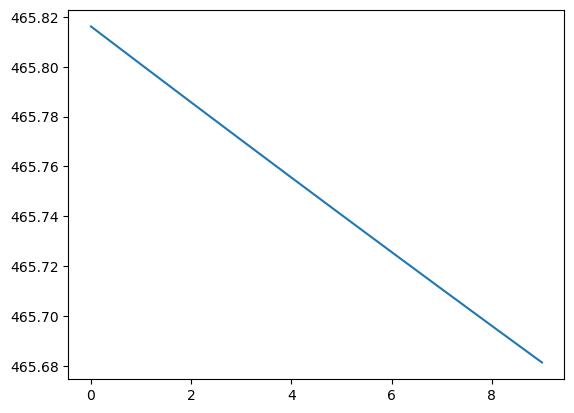

In [17]:
# 10 pts
# Find the a good learning rate and plot the solution for 10 epochs
# YOUR CODE HERE
best = 10000000000 #Create a best variable for the best loss achieved
best_loss = [] #Create a best_loss to hold the best of the losses
best_lr = 1 #Create a best learning rate variable to get the best learning rate found

#For many learning rates in the range I played with and found did pretty well, test it and update the values if they were the best
for i in range(1000000000000, 10000000000000, 1000000000000):
    lr = 1/i #Calculate the new learning rate
    w, loss = gradient_descent(X_train,y_train,lr,10,0.001,1) #Run a new run of gradient descent
    
    #If this was the best loss achieved, update the losses
    if loss[9] < best:
        best = loss[9] #Update the best we are looking for
        best_loss = loss #Update the list of best losses
        best_lr = lr #Update the best learning rate
print(best_loss) #Print the best loss list
print(best_lr) #Print the best learning rate
plt.plot(best_loss) #Plot the loss curve

# Question 6: (15 pts)

Fit all combinations of parameters $\lambda \in \{0, 0.01, 0.1, 1.\}$ and $\beta \in \{0.01, 0.1, 1, 2\}$ for training different models. Measure the RMSE in validation and create a Pandas table with the results, where the first column is "lambda", the second is "beta", and the third is the RMSE on validation. Pick the best model, and measure its RMSE on testing.

In [18]:
# the following function measures the Root mean squared error
def rmse(X, y, w):
    X = X.copy()
    X = np.c_[np.ones((X.shape[0], 1)), X]  # add 1 as first column for bias term
    y_pred = X.dot(w)
    return np.sqrt(((y-y_pred)**2).mean())

In [19]:
# 10 points
import pandas as pd
lambdas = [0, 0.01, 0.1, 1]
betas = [0.01, 0.1, 1, 2]

#lambdaAll: Run a gradient descent for each beta and lambda and find its error
#Input: lambda and beta
#Output: lambda, beta, and the validation
def lambdaAll(lambda_, beta):
    w, _ = gradient_descent(X_train,y_train,best_lr,10,lambda_,beta) #Run a new run of gradient descent
    valid = rmse(X_valid, y_valid, w) #Validate the data
    valid = f'{valid:.4f}' #Formatting source: https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
    return lambda_, beta, valid #Return the values

lamAll = np.vectorize(lambdaAll) #Vectorize the lambdaAll function
lAll = lamAll(np.array(lambdas)[:, np.newaxis], np.array(betas)) #Call the vectorized lambdaAll on all of the betas and lambdas
print(lAll) #Print those values

(array([[0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, 0.01],
       [0.1 , 0.1 , 0.1 , 0.1 ],
       [1.  , 1.  , 1.  , 1.  ]]), array([[0.01, 0.1 , 1.  , 2.  ],
       [0.01, 0.1 , 1.  , 2.  ],
       [0.01, 0.1 , 1.  , 2.  ],
       [0.01, 0.1 , 1.  , 2.  ]]), array([['27.6671', '51.3815', '40.1686', '76.8005'],
       ['25.0163', '28.6369', '43.0119', '31.4833'],
       ['22.0769', '76.4374', '22.3657', '44.2248'],
       ['47.9126', '24.9867', '21.9875', '37.7722']], dtype='<U7'))


Unsorted 
     lambda_  beta validation
0      0.00  0.01    27.6671
1      0.00  0.10    51.3815
2      0.00  1.00    40.1686
3      0.00  2.00    76.8005
4      0.01  0.01    25.0163
5      0.01  0.10    28.6369
6      0.01  1.00    43.0119
7      0.01  2.00    31.4833
8      0.10  0.01    22.0769
9      0.10  0.10    76.4374
10     0.10  1.00    22.3657
11     0.10  2.00    44.2248
12     1.00  0.01    47.9126
13     1.00  0.10    24.9867
14     1.00  1.00    21.9875
15     1.00  2.00    37.7722
Sorted 
     lambda_  beta validation
14     1.00  1.00    21.9875
8      0.10  0.01    22.0769
10     0.10  1.00    22.3657
13     1.00  0.10    24.9867
4      0.01  0.01    25.0163
0      0.00  0.01    27.6671
5      0.01  0.10    28.6369
7      0.01  2.00    31.4833
15     1.00  2.00    37.7722
2      0.00  1.00    40.1686
6      0.01  1.00    43.0119
11     0.10  2.00    44.2248
12     1.00  0.01    47.9126
1      0.00  0.10    51.3815
9      0.10  0.10    76.4374
3      0.00  2.00    76

<Axes: title={'center': 'Validation vs Beta Value'}, xlabel='validation', ylabel='beta'>

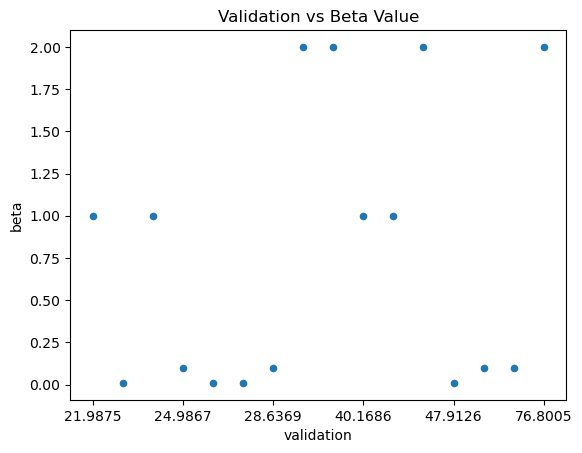

In [20]:
lambdas_ = np.concatenate(lAll[0]) #Concatenate all lambdas into one array
betas_ = np.concatenate(lAll[1]) #Concatenate all betas into one array
valids_ = np.concatenate(lAll[2]) #Concatenate all validations into one array

df = pd.DataFrame(lambdas_, columns = ["lambda_"]) #Create the dataframe using lambda
df["beta"] = betas_ #Add the betas to the dataframe
df["validation"] = valids_ #Add the validations to the dataframe
print("Unsorted \n", df) #Print the dataframe
dfVal = df.sort_values(by=["validation"]) #Sort the dataframe by validation
print("Sorted \n", dfVal) #Print the sorted dataframe

fig, ax = plt.subplots(1,1) #Create a subplot so I can use the axes set xticks
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) #Set the ticks so that the x axis looks better
dfVal.plot.scatter(x="validation", y="beta", title="Validation vs Beta Value", ax = ax) #Plot the validations with respect to the betas

In [21]:
import time #Add timing because I am curious
startTime = time.time() #Start the timer
lambdaBest = 1 #Set the best lambda
betaBest = 2 #Set the best beta
w, _ = gradient_descent(X_train,y_train,best_lr,1000,lambdaBest,betaBest) #Run a new run of gradient descent
RMSE = rmse(X_test, y_test, w) #RMSE on the testing data
print(f"RMSE for best values on the testing set: {RMSE}") #Print the RMSE

endTime = time.time() #End the timer
print(f"Time Taken: {(endTime - startTime)/60} minutes") #Print how long it took

RMSE for best values on the testing set: 21.974062495607324
Time Taken: 3.5238925139109294 minutes


**(5 pts) What can you comment about the beta parameter for $\lambda$ and $\beta$?**

The betas are really dependent on the lambda. If we need to pick a beta without the lambda, though, a 0.01 beta appears to be the best guess for the best validation while 0.1 appears to be the worst, given that 3 of the 4 0.01s are in the half with the best validation while 3 of the 4 0.1 values are in the worse half. This has been true in multiple runs. This does not mean a lot given how, at the same time, a beta of 2 has been both the best and the worst in multiple test runs. It just means that beta and lambda need to be chosen together intelligently rather than playing with them individually.